In [1]:
#Import Libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import zero_one_loss
from sklearn.metrics import roc_auc_score
#----------------------------------------------------

In [2]:
#load breast cancer data

BreastData = load_breast_cancer()

#X Data
X = BreastData.data

#y Data
y = BreastData.target

#----------------------------------------------------

In [3]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)


#----------------------------------------------------

In [4]:
#Applying SGDClassifier Model 

'''
#sklearn.linear_model.SGDClassifier(loss='hinge’, penalty=’l2’, alpha=0.0001,l1_ratio=0.15, fit_intercept=True,
#                                   max_iter=None,tol=None, shuffle=True, verbose=0, epsilon=0.1,n_jobs=None,
#                                   random_state=None, learning_rate='optimal’, eta0=0.0, power_t=0.5,
#                                   early_stopping=False, validation_fraction=0.1,n_iter_no_change=5,
#                                   class_weight=None,warm_start=False, average=False, n_iter=None)
'''

SGDClassifierModel = SGDClassifier(penalty='l2',loss='squared_loss',learning_rate='optimal',random_state=33)
SGDClassifierModel.fit(X_train, y_train)

#Calculating Details
print('SGDClassifierModel Train Score is : ' , SGDClassifierModel.score(X_train, y_train))
print('SGDClassifierModel Test Score is : ' , SGDClassifierModel.score(X_test, y_test))
print('SGDClassifierModel loss function is : ' , SGDClassifierModel.loss_function_)
print('SGDClassifierModel No. of iteratios is : ' , SGDClassifierModel.n_iter_)
print('----------------------------------------------------')

SGDClassifierModel Train Score is :  0.6220472440944882
SGDClassifierModel Test Score is :  0.6382978723404256
SGDClassifierModel loss function is :  <sklearn.linear_model._sgd_fast.SquaredLoss object at 0x7f295a9826b0>
SGDClassifierModel No. of iteratios is :  77
----------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,


Predicted Value for SGDClassifierModel is :  [1 1 1 1 1 1 1 1 1 1]
Confusion Matrix is : 
 [[  0  68]
 [  0 120]]


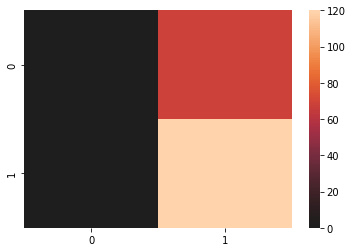

In [5]:
#Calculating Prediction
y_pred = SGDClassifierModel.predict(X_test)
print('Predicted Value for SGDClassifierModel is : ' , y_pred[:10])

#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

In [6]:
#----------------------------------------------------
#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

#----------------------------------------------------
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)

#----------------------------------------------------
#Calculating Precision recall Score :  
#metrics.precision_recall_fscore_support(y_true, y_pred, beta=1.0, labels=None, pos_label=1, average=
#                                        None, warn_for = ('precision’,’recall’, ’f-score’), sample_weight=None)

PrecisionRecallScore = precision_recall_fscore_support(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Precision Recall Score is : ', PrecisionRecallScore)


Accuracy Score is :  120
F1 Score is :  0.6382978723404256
Precision Recall Score is :  (0.6382978723404256, 0.6382978723404256, 0.6382978723404256, None)


In [7]:
#----------------------------------------------------
#Calculating Precision Score : (Specificity) #(TP / float(TP + FP))  
# precision_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’,sample_weight=None)

PrecisionScore = precision_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Precision Score is : ', PrecisionScore)

#----------------------------------------------------
#Calculating Recall Score : (Sensitivity) (TP / float(TP + FN))   1 / 1+2  
# recall_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

RecallScore = recall_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Recall Score is : ', RecallScore)

#----------------------------------------------------
#Calculating Precision recall Curve :  
# precision_recall_curve(y_true, probas_pred, pos_label=None, sample_weight=None)

PrecisionValue, RecallValue, ThresholdsValue = precision_recall_curve(y_test,y_pred)
#print('Precision Value is : ', PrecisionValue)
#print('Recall Value is : ', RecallValue)
print('Thresholds Value is : ', ThresholdsValue)

#----------------------------------------------------
#Calculating classification Report :  
#classification_report(y_true, y_pred, labels=None, target_names=None,sample_weight=None, digits=2, output_dict=False)

ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

#----------------------------------------------------
#Calculating Area Under the Curve :  

fprValue2, tprValue2, thresholdsValue2 = roc_curve(y_test,y_pred)
AUCValue = auc(fprValue2, tprValue2)
print('AUC Value  : ', AUCValue)

#----------------------------------------------------
#Calculating Zero One Loss:  
#zero_one_loss(y_true, y_pred, normalize = True, sample_weight = None)

ZeroOneLossValue = zero_one_loss(y_test,y_pred,normalize=False) 
print('Zero One Loss Value : ', ZeroOneLossValue )

#----------------------------------------------------
#Calculating ROC AUC Score:  
#roc_auc_score(y_true, y_score, average=’macro’, sample_weight=None,max_fpr=None)

ROCAUCScore = roc_auc_score(y_test,y_pred, average='micro') #it can be : macro,weighted,samples
print('ROCAUC Score : ', ROCAUCScore)

#----------------------------------------------------
#Calculating Receiver Operating Characteristic :  
#roc_curve(y_true, y_score, pos_label=None, sample_weight=None,drop_intermediate=True)

fprValue, tprValue, thresholdsValue = roc_curve(y_test,y_pred)
print('fpr Value  : ', fprValue)
print('tpr Value  : ', tprValue)
print('thresholds Value  : ', thresholdsValue)

Precision Score is :  0.6382978723404256
Recall Score is :  0.6382978723404256
Thresholds Value is :  [1]
Classification Report is :                precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.64      1.00      0.78       120

    accuracy                           0.64       188
   macro avg       0.32      0.50      0.39       188
weighted avg       0.41      0.64      0.50       188

AUC Value  :  0.5
Zero One Loss Value :  68
ROCAUC Score :  0.5
fpr Value  :  [0. 1.]
tpr Value  :  [0. 1.]
thresholds Value  :  [2 1]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
